In [81]:
# Installing necessary libraries
!pip install nltk
!pip install textblob
!pip install wordcloud



In [82]:

!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.noun  
  inflating: /usr/shar

In [86]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mydata3/AmazonProductReview.csv
/kaggle/input/mydata3/AmazonProductReview.csv


In [87]:
# Load the dataset and display
df = pd.read_csv("/kaggle/input/mydata3/AmazonProductReview.csv")
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [89]:
# Drop duplicate entries
df = df.drop_duplicates()

In [90]:
# Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [91]:
# Convert the 'reviews.text' column to lowercase
df['reviews.text'] = df['reviews.text'].str.lower()

In [92]:
# Display the 'reviews.text' column
df['reviews.text']

0       i initially had trouble deciding between the p...
1       allow me to preface this with a little history...
2       i am enjoying it so far. great for reading. ha...
3       i bought one of the first paperwhites and have...
4       i have to say upfront - i don't like coroporat...
                              ...                        
1592    this is not the same remote that i got for my ...
1593    i have had to change the batteries in this rem...
1594    remote did not activate, nor did it connect to...
1595    it does the job but is super over priced. i fe...
1596    i ordered this item to replace the one that no...
Name: reviews.text, Length: 1597, dtype: object

In [94]:
# Remove punctuation marks from the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]', '')

In [95]:
# Display the 'reviews.text' column
df['reviews.text']

0       i initially had trouble deciding between the p...
1       allow me to preface this with a little history...
2       i am enjoying it so far. great for reading. ha...
3       i bought one of the first paperwhites and have...
4       i have to say upfront - i don't like coroporat...
                              ...                        
1592    this is not the same remote that i got for my ...
1593    i have had to change the batteries in this rem...
1594    remote did not activate, nor did it connect to...
1595    it does the job but is super over priced. i fe...
1596    i ordered this item to replace the one that no...
Name: reviews.text, Length: 1597, dtype: object

In [96]:
# Remove all numerical characters from the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].str.replace('\d', '')

In [97]:
# Display the 'reviews.text' column
df['reviews.text']

0       i initially had trouble deciding between the p...
1       allow me to preface this with a little history...
2       i am enjoying it so far. great for reading. ha...
3       i bought one of the first paperwhites and have...
4       i have to say upfront - i don't like coroporat...
                              ...                        
1592    this is not the same remote that i got for my ...
1593    i have had to change the batteries in this rem...
1594    remote did not activate, nor did it connect to...
1595    it does the job but is super over priced. i fe...
1596    i ordered this item to replace the one that no...
Name: reviews.text, Length: 1597, dtype: object

In [98]:
# Download stopwords from the NLTK library
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
# Store the list of English stopwords in the variable 'sw'
sw = stopwords.words('english')

In [100]:
# Remove any stopwords used in the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [101]:
# # Display the 'reviews.text' column
df['reviews.text']

0       initially trouble deciding paperwhite voyage r...
1       allow preface little history. (was) casual rea...
2       enjoying far. great reading. original fire sin...
3       bought one first paperwhites pleased constant ...
4       say upfront - like coroporate, hermetically cl...
                              ...                        
1592    remote got alexa-echo control volume.... think...
1593    change batteries remote twice per month since ...
1594    remote activate, connect box.a poorly designed...
1595    job super priced. feel like offer replacement ...
1596    ordered item replace one longer works. directi...
Name: reviews.text, Length: 1597, dtype: object

In [102]:
# Find the frequency of each word used in the 'reviews.text' column
pd.Series(' '.join(df['reviews.text']).split()).value_counts()

kindle           1356
fire             1265
like             1146
amazon           1108
use               859
                 ... 
uploaded.           1
click)--even        1
lands               1
can,                1
subscription.       1
Name: count, Length: 11817, dtype: int64

In [103]:
# Find the last 1000 words with the lowest frequency and store in the variable 'temp_df'
temp_df = pd.Series(' '.join(df['reviews.text']).split()).value_counts()[-1000:]

In [104]:
# Display 'temp_df'
temp_df

limit.           1
unsupervised     1
scarce           1
corner.          1
mark             1
                ..
uploaded.        1
click)--even     1
lands            1
can,             1
subscription.    1
Name: count, Length: 1000, dtype: int64

In [105]:
# Remove any words from the column 'reviews.text' that are also present in 'temp_df'
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in temp_df))

In [106]:
# Display the 'reviews.text' column
df['reviews.text']

0       initially trouble deciding paperwhite voyage r...
1       allow preface little history. (was) casual rea...
2       enjoying far. great reading. original fire sin...
3       bought one first paperwhites pleased constant ...
4       say upfront - like coroporate, hermetically cl...
                              ...                        
1592    remote got alexa-echo control volume.... think...
1593    change batteries remote twice per month since ...
1594    remote activate, connect box.a poorly designed...
1595    job super priced. feel like offer replacement ...
1596    ordered item replace one longer works. directi...
Name: reviews.text, Length: 1597, dtype: object

In [107]:
# Download the Punkt databse from the NLTK library
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
# Use the TextBlob library to extract words from each review in the 'reviews.text' column
df['reviews.text'].apply(lambda x: TextBlob(x).words).head()

0    [initially, trouble, deciding, paperwhite, voy...
1    [allow, preface, little, history, was, casual,...
2    [enjoying, far, great, reading, original, fire...
3    [bought, one, first, paperwhites, pleased, con...
4    [say, upfront, like, coroporate, hermetically,...
Name: reviews.text, dtype: object

In [109]:
# Download the WordNet database from the NLTK library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
# Reduce the words from the 'reviews.text' column to its root form
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [111]:
# Download the omw-1.4 database from the NLTK library
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [112]:
# Display the 'reviews.text' column
df['reviews.text']

0       initially trouble deciding paperwhite voyage r...
1       allow preface little history. (was) casual rea...
2       enjoying far. great reading. original fire sin...
3       bought one first paperwhites pleased constant ...
4       say upfront - like coroporate, hermetically cl...
                              ...                        
1592    remote got alexa-echo control volume.... think...
1593    change battery remote twice per month since pu...
1594    remote activate, connect box.a poorly designed...
1595    job super priced. feel like offer replacement ...
1596    ordered item replace one longer works. directi...
Name: reviews.text, Length: 1597, dtype: object

In [113]:
# Determine the term frequency of words in the 'reviews.text' colum
#tf = df["reviews.text"].apply(lambda x: pd.value_counts
tf = df["reviews.text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [116]:
# Rename the columns of the dataframe 'tf' to 'words' and 'tf'
tf.columns = ["words", "tf"]

In [117]:
# Sort 'tf' in descending order and assign to 'tf_sorted'
tf_sorted = tf.sort_values(by='tf', ascending=False)

In [118]:
# Display the 'tf_sorted' column
tf_sorted

,words,tf
189,kindle,1356.0
194,fire,1273.0
318,like,1153.0
213,amazon,1130.0
148,use,859.0
...,...,...
5877,5.,1.0
5876,over-technical,1.0
5875,"shortly,",1.0
5873,platform.,1.0


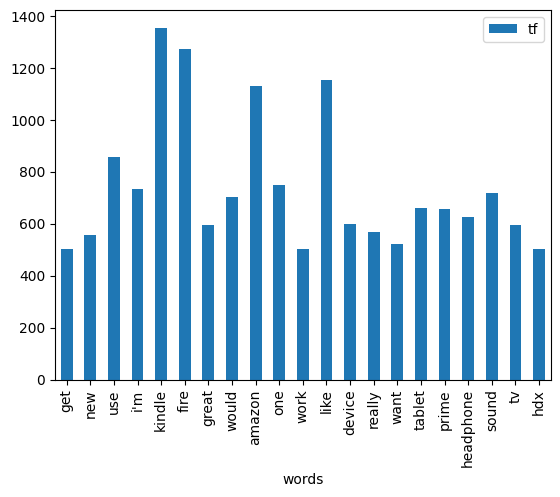

In [119]:
# Create a bar plot for words that have a term frequency greater than 500
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show(block=True)

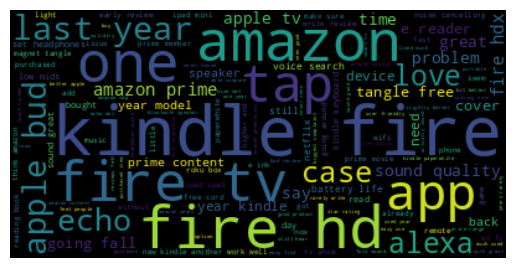

In [121]:

# Generate a word cloud from the text in 'reviews.text'
text = " ".join(i for i in df["reviews.text"])
#text = " ".join(i for i in df.Review)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [122]:
# Download the vader_lexicon database from the NLTK library
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [123]:
# Display the 'reviews.text' column
df["reviews.text"]

0       initially trouble deciding paperwhite voyage r...
1       allow preface little history. (was) casual rea...
2       enjoying far. great reading. original fire sin...
3       bought one first paperwhites pleased constant ...
4       say upfront - like coroporate, hermetically cl...
                              ...                        
1592    remote got alexa-echo control volume.... think...
1593    change battery remote twice per month since pu...
1594    remote activate, connect box.a poorly designed...
1595    job super priced. feel like offer replacement ...
1596    ordered item replace one longer works. directi...
Name: reviews.text, Length: 1597, dtype: object

In [124]:
# Initialize an instance of the 'SentimentIntensityAnalyzer'
sia = SentimentIntensityAnalyzer()

In [125]:
# Apply the 'polarity_scores' method from the SentimentIntensityAnalyzer instance to each review in the first 10 rows
df["reviews.text"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.058, 'neu': 0.697, 'pos': 0.245, 'co...
1    {'neg': 0.058, 'neu': 0.714, 'pos': 0.228, 'co...
2    {'neg': 0.273, 'neu': 0.4, 'pos': 0.327, 'comp...
3    {'neg': 0.04, 'neu': 0.781, 'pos': 0.179, 'com...
4    {'neg': 0.046, 'neu': 0.641, 'pos': 0.313, 'co...
5    {'neg': 0.108, 'neu': 0.769, 'pos': 0.123, 'co...
6    {'neg': 0.058, 'neu': 0.714, 'pos': 0.228, 'co...
7    {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
8    {'neg': 0.058, 'neu': 0.697, 'pos': 0.245, 'co...
9    {'neg': 0.273, 'neu': 0.4, 'pos': 0.327, 'comp...
Name: reviews.text, dtype: object

In [126]:
# Extract the compound sentiment score from each row
df["reviews.text"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0    0.9661
1    0.9836
2    0.3818
3    0.9678
4    0.9951
5    0.2075
6    0.9836
7    0.9412
8    0.9661
9    0.3818
Name: reviews.text, dtype: float64

In [127]:
# Categorize each review based on the compound sentiment
df["reviews.text"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    pos
4    pos
5    pos
6    pos
7    pos
8    pos
9    pos
Name: reviews.text, dtype: object

In [128]:
# Add a new column to 'df' named 'polarity_score' which contains the compound sentiment score
df["polarity_score"] = df['reviews.text'].apply(lambda x: sia.polarity_scores(x)["compound"])

In [129]:
# Display the first 20 results from 'df'
df.head(20)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight,polarity_score
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams,0.9661
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams,0.9836
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,0.3818
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,bought one first paperwhites pleased constant ...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams,0.9678
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,https://www.amazon.com/Kindle-Paperwhite-High-...,"say upfront - like coroporate, hermetically cl...",I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams,0.9951
5,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,"previous kindle dx, second kindle years. love ...",Great device for reading. 8 people found this ...,NaN,NaN,Kelvin Law,NaN,NaN,205 grams,0.2075
6,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More 28 people fo...,NaN,NaN,Ricky,NaN,NaN,205 grams,0.9836
7,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,got mine right now. look previous generation e...,Definitely better than the previous generation...,NaN,NaN,Bandler,NaN,NaN,205 grams,0.9412
8,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets! 16 people found...",NaN,NaN,Cristina M,NaN,NaN,205 grams,0.9661
9,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,http://www.amazon.com/Kindle-Paperwhite-High-R...,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader 19 ...,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams,0.3818


In [130]:
# Add new column to 'df' named 'Sentiment_Label' which categorizes each review as either 'pos' or 'neg'
df["Sentiment_Label"] = df["reviews.text"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [135]:
# Calculate the average Sentiment_Label
df.groupby("Sentiment_Label")["reviews.rating"].mean()
#df.groupby("Sentiment_Label")["Stars"].mean()


Sentiment_Label
neg    3.419643
pos    4.458216
Name: reviews.rating, dtype: float64